In [40]:
# Decomposition Analysis, from Paul
#    Oct. 20, 2016
#      TODO: Add pattern corr b/w Sum and Full for wavenumber breakdown.

In [41]:
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
#import the Basemap plotting package
from mpl_toolkits.basemap import Basemap
from pylab import show, subplot, figure, title, plot, xlabel, ylabel
#import meshgrid for use in mapping
from numpy import meshgrid, arange
from numpy.fft import rfft, irfft

import rlx_utils as rutl
import cccmautils as cutl
import constants as con

%matplotlib inline



def PlotField(Longitude, Latitude,Field, Title, ContourLevels = []):
    m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')#projection='moll',lon_0=180,resolution='c')
    #set up plotting grid (standard commands)
    LonGrid, LatGrid = meshgrid(Longitude, Latitude)
    x, y = m(LonGrid, LatGrid)
    #draw standard markings on map: coasts, latitudes, longitudes
    m.drawcoastlines()
    m.drawparallels(arange(-80.,81.,20.))
    m.drawmeridians(arange(-180.,181.,20.))
    m.drawmapboundary()
    #filled color shading
    #if contour levels passed, use them, otherwise use contourf defaults
    if ContourLevels==[]:
        m.contourf(x, y, Field)
    else:
        m.contourf(x, y, Field,ContourLevels)
    #add title and colorbar
    title(Title)
    m.colorbar()

def cplotfield(lon,lat,fld,title,axis=None,cmin=None,cmax=None,fsz=None):
    
    if axis==None:
        axis=plt.gca()
    bm,pc = cplt.kemmap(fld,lat,lon,axis=axis,title=title,cmin=cmin,cmax=cmax,
                        ptype='nh',round=False,suppcb=True)
    if fsz!=None:
        axis.set_title(title,fontsize=fsz)
    return bm,pc

conv=1
    
DataRoot = '/Users/kelly/DATA/DataDisk/'

Case = 3
if Case == 0:
    VariableFileName = 'st'
    VariableName = 'ST'
    #contour ranges
    dcon = 1.0
    cmin=-10; cmax=10
    cmins=-2.5; cmaxs=2.5

    ctlcontsl = list(np.arange(-40,41,10))
    ctlcontsl.remove(0)
    ctlcontsh = list(np.arange(-9,10,3))
    ctlcontsh.remove(0)
elif Case == 1:
    VariableFileName = 'pmsl'
    VariableName = 'PMSL'
    dcon = 0.5
    cmin=-7.5; cmax=7.5
    cmins=-2; cmaxs=2 # small for small m
    
    # climo contours
    ctlcontsl = list(np.arange(992,1033,8))
    ctlcontsh = list(np.arange(-5,5.5,1))
    ctlcontsh.remove(0)
    
elif Case == 2:
    VariableFileName = 'u85000'
    VariableName = 'U'
    #contour ranges
    dcon = 1.0
    cmin=-3; cmax=3
    cmins=-.5; cmaxs=.5
    
    # climo contours
    #ctlcontsu=list(np.arange(-10,26,5)) # for U700
    ctlcontsl=list(np.arange(-4,17,4)) # for U850 low pass
    ctlcontsh=list(np.arange(-6,6,1)) # for U850 high pass
    ctlcontsl.remove(0)
    ctlcontsh.remove(0)
elif Case == 3:
    VariableFileName = 'gz50000'
    VariableName = 'PHI'
    #contour ranges
    dcon = 1.0
    cmin=-100; cmax=100
    cmins=-10; cmaxs=10
    conv=1/con.get_g()
    print conv
    
    # climo contours
    ctlcontsl=list(np.arange(4900,6000,200)) # low pass
    ctlcontsh=list(np.arange(-30,31,7.5)) # high pass
    ctlcontsh.remove(0)
    print ctlcontsh, ctlcontsl

cons = arange(-15*dcon,16*dcon, dcon)   
ExpTag = ['preipreiice','2xco2preiice',  'prei2xco2iceb', '2xco22xco2ice']
YearTag = ['2922-3121', '2552-2751', '3022-3221', '2452-2651']
DataFileList = []
FieldList = []



0.101930398662
[-30.0, -22.5, -15.0, -7.5, 7.5, 15.0, 22.5, 30.0] [4900, 5100, 5300, 5500, 5700, 5900]


/Users/kelly/DATA/DataDisk/preipreiice_gz50000_2922-3121_DJF_mean.nc
/Users/kelly/DATA/DataDisk/2xco2preiice_gz50000_2552-2751_DJF_mean.nc
/Users/kelly/DATA/DataDisk/prei2xco2iceb_gz50000_3022-3221_DJF_mean.nc
/Users/kelly/DATA/DataDisk/2xco22xco2ice_gz50000_2452-2651_DJF_mean.nc
5848.20037782 4989.7104338
34.948317962 -36.7940774191
(64, 128)


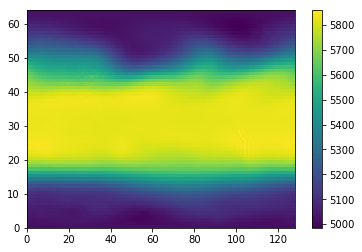

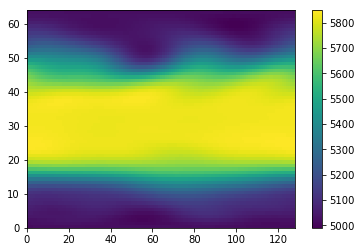

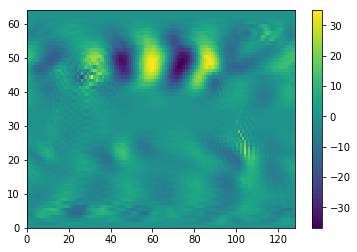

In [42]:
#extract data from various files for given file name
for j in range(4):
    FileName = ExpTag[j]+'_'+VariableFileName+'_'+YearTag[j]+'_DJF_mean.nc'
    print DataRoot+FileName
    DataFileList.append(Dataset(DataRoot+'/'+ExpTag[j]+'/'+FileName))
    FieldList.append(DataFileList[j].variables[VariableName][:,:].squeeze())

pipi=FieldList[0][:]*conv
copi=FieldList[1][:]*conv
pico=FieldList[2][:]*conv
coco=FieldList[3][:]*conv

### controls
#fourier decompose longitudes 0:127 (last entry is same as first)
pipi_f = rfft(pipi[:,:-1], axis=-1)
#set m>5=0 for all latitudes low pass filter
pipi_f[:,4:] = 0
#lowpass filter
pipi_lpf = irfft(pipi_f,axis = -1)
#highpass filter
pipi_hpf = pipi[:,:-1]-pipi_lpf

print pipi_lpf.max(), pipi_lpf.min()
print pipi_hpf.max(), pipi_hpf.min()
print pipi_hpf.shape
plt.figure(); plt.pcolor(pipi[:,:-1]); plt.colorbar()
plt.figure(); plt.pcolor(pipi_lpf); plt.colorbar()
plt.figure(); plt.pcolor(pipi_hpf); plt.colorbar()

In [43]:
#perturbations
#co2
co2_pert = (FieldList[1][:]-FieldList[0][:])*conv
#ice
ice_pert = (FieldList[2][:]-FieldList[0][:])*conv
#total
ice_co2_pert = (FieldList[3][:]-FieldList[0][:])*conv


#longitude
Longitude = DataFileList[0].variables['lon'][:]
#latitude
Latitude =  DataFileList[0].variables['lat'][:]
#diff
diff = ice_pert+co2_pert-ice_co2_pert
#fourier decompose longitudes 0:127 (last entry is same as first)
diff_f = rfft(diff[:,:-1], axis=-1)
#set m>5=0 for all latitudes low pass filter
diff_f[:,4:] = 0
#lowpass filter
lpf = irfft(diff_f,axis = -1)

print 'ice_pert'
print ice_pert


#### now decompose ice and co2 separately
ice_f = rfft(ice_pert[:,:-1], axis=-1)
co2_f = rfft(co2_pert[:,:-1], axis=-1)
full_f = rfft(ice_co2_pert[:,:-1], axis=-1)

ice_f[:,4:] = 0
co2_f[:,4:] = 0
full_f[:,4:] = 0

ice_lpf = irfft(ice_f,axis=-1)
co2_lpf = irfft(co2_f,axis=-1)
full_lpf = irfft(full_f,axis=-1)

print 'diff'
print diff

ice_pert
[[  2.58807659   2.59962344   2.61117029 ...,   2.56339025   2.57573342
    2.58807659]
 [  2.69916487   2.76486206   2.83055949 ...,   2.57175183   2.63426375
    2.69916487]
 [  2.78158522   2.9221375    3.06069922 ...,   2.50127649   2.64023638
    2.78158522]
 ..., 
 [ 38.58065796  38.76580429  38.93860626 ...,  38.19364166  38.38754654
   38.58065796]
 [ 35.91971588  36.08813858  36.24780655 ...,  35.56574631  35.74492264
   35.91971588]
 [ 33.33880615  33.41047668  33.47896194 ...,  33.18232727  33.26235962
   33.33880615]]
diff
[[ -6.74731445  -6.74253464  -6.73696136 ...,  -6.75687408  -6.75209427
   -6.74731445]
 [ -6.90459061  -6.89144897  -6.8775177  ...,  -6.92887878  -6.91733551
   -6.90459061]
 [ -7.25776291  -7.25099182  -7.23825073 ...,  -7.25895691  -7.259758
   -7.25776291]
 ..., 
 [-20.3534317  -20.4585495  -20.49636841 ..., -19.93535614 -20.17983246
  -20.3534317 ]
 [-18.83244324 -18.94711304 -19.03310394 ..., -18.51390839 -18.68791199
  -18.83244324]
 [-17

In [44]:
print ice_pert.squeeze().shape
print Longitude.shape
print Latitude.shape

(64, 129)
(129,)
(64,)


(64, 129)


(<mpl_toolkits.basemap.Basemap at 0x11f893050>,
 <matplotlib.contour.QuadContourSet at 0x12315f8d0>)

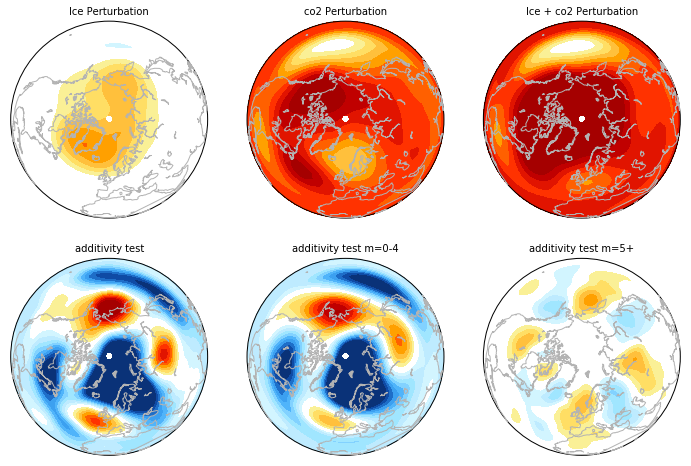

In [45]:
print ice_pert.shape

figure(5,figsize=[12,8])
subplot(2,3,1)
cplotfield(Longitude, Latitude, ice_pert.squeeze(),'Ice Perturbation',cmin=cmin,cmax=cmax)
subplot(2,3,2)
cplotfield(Longitude, Latitude, co2_pert.squeeze(),'co2 Perturbation',cmin=cmin,cmax=cmax)
subplot(2,3,3)
cplotfield(Longitude, Latitude, ice_co2_pert.squeeze(),'Ice + co2 Perturbation',cmin=cmin,cmax=cmax)

subplot(2,3,4)
cplotfield(Longitude, Latitude, diff, 'additivity test',cmin=cmins,cmax=cmaxs)
subplot(2,3,5)
cplotfield(Longitude[:-1], Latitude, lpf, 'additivity test m=0-4',cmin=cmins,cmax=cmaxs)
subplot(2,3,6)
cplotfield(Longitude[:-1], Latitude, diff[:,:-1]-lpf, 'additivity test m=5+',cmin=cmins,cmax=cmaxs)



In [46]:
cutl=reload(cutl)
northof=0
wgts=cutl.calc_areawgts(Latitude[Latitude>northof],Longitude).flatten()

combo = ice_pert.squeeze()+co2_pert.squeeze()
full = ice_co2_pert.squeeze()
combo_lpf = ice_lpf+co2_lpf
ice_hpf = ice_pert.squeeze()[:,:-1]-ice_lpf
co2_hpf = co2_pert.squeeze()[:,:-1]-co2_lpf
combo_hpf = ice_hpf+co2_hpf
full_hpf = ice_co2_pert.squeeze()[:,:-1]-full_lpf


# compute pattern correlation b/w SUM and FULL
#prval,ppval = cutl.pattcorr_pearson(combo[Latitude>northof,:].flatten(),
#                                          full[Latitude>northof,:].flatten())
prval = cutl.pattcorr(combo[Latitude>northof,:-1].flatten(),
                      full[Latitude>northof,:-1].flatten(),weights=wgts)
pvarexp = (prval**2)*100 # variance explained
rmse = cutl.calc_areawgted_rmse(combo[Latitude>northof,:-1].flatten(),
                              full[Latitude>northof,:-1].flatten(),weights=wgts)
std = cutl.calc_areawgted_std(full[Latitude>northof,:-1].flatten(),weights=wgts)
                              
#prval_lpf,ppval_lpf = cutl.pattcorr_pearson(combo_lpf[Latitude>northof,:].flatten(),
#                                          full_lpf[Latitude>northof,:].flatten())
prval_lpf = cutl.pattcorr(combo_lpf[Latitude>northof,:].flatten(),
                          full_lpf[Latitude>northof,:].flatten(),weights=wgts)
pvarexp_lpf = (prval_lpf**2)*100 # variance explained
rmse_lpf = cutl.calc_areawgted_rmse(combo_lpf[Latitude>northof,:].flatten(),
                              full_lpf[Latitude>northof,:].flatten(),weights=wgts)
std_lpf = cutl.calc_areawgted_std(full_lpf[Latitude>northof,:].flatten(),weights=wgts)

#prval_hpf,ppval_hpf = cutl.pattcorr_pearson(combo_hpf[Latitude>northof,:].flatten(),
#                                          full_hpf[Latitude>northof,:].flatten())
prval_hpf = cutl.pattcorr(combo_hpf[Latitude>northof,:].flatten(),
                                  full_hpf[Latitude>northof,:].flatten(),weights=wgts)
pvarexp_hpf = (prval_hpf**2)*100 # variance explained
rmse_hpf = cutl.calc_areawgted_rmse(combo_hpf[Latitude>northof,:].flatten(),
                              full_hpf[Latitude>northof,:].flatten(),weights=wgts)
std_hpf = cutl.calc_areawgted_std(full_hpf[Latitude>northof,:].flatten(),weights=wgts)



# ###### Does it make sense to pattern correlate each individual forcing w/ the FULL?


(64, 128)
(4096,)


In [47]:
# compute patt corr and rmse for individual forcings
#   ICE
ice = ice_pert.squeeze()
iceprval = cutl.pattcorr(ice[Latitude>northof,:-1].flatten(),
                      full[Latitude>northof,:-1].flatten(),weights=wgts)
icepvarexp = (iceprval**2)*100 # variance explained
icermse = cutl.calc_areawgted_rmse(ice[Latitude>northof,:-1].flatten(),
                              full[Latitude>northof,:-1].flatten(),weights=wgts)

iceprval_lpf = cutl.pattcorr(ice_lpf[Latitude>northof,:].flatten(),
                          full_lpf[Latitude>northof,:].flatten(),weights=wgts)
icepvarexp_lpf = (iceprval_lpf**2)*100 # variance explained
icermse_lpf = cutl.calc_areawgted_rmse(ice_lpf[Latitude>northof,:].flatten(),
                              full_lpf[Latitude>northof,:].flatten(),weights=wgts)

iceprval_hpf = cutl.pattcorr(ice_hpf[Latitude>northof,:].flatten(),
                                  full_hpf[Latitude>northof,:].flatten(),weights=wgts)
icepvarexp_hpf = (iceprval_hpf**2)*100 # variance explained
icermse_hpf = cutl.calc_areawgted_rmse(ice_hpf[Latitude>northof,:].flatten(),
                              full_hpf[Latitude>northof,:].flatten(),weights=wgts)

#   CO2
co2 = co2_pert.squeeze()
co2prval = cutl.pattcorr(co2[Latitude>northof,:-1].flatten(),
                      full[Latitude>northof,:-1].flatten(),weights=wgts)
co2pvarexp = (co2prval**2)*100 # variance explained
co2rmse = cutl.calc_areawgted_rmse(co2[Latitude>northof,:-1].flatten(),
                              full[Latitude>northof,:-1].flatten(),weights=wgts)

co2prval_lpf = cutl.pattcorr(co2_lpf[Latitude>northof,:].flatten(),
                          full_lpf[Latitude>northof,:].flatten(),weights=wgts)
co2pvarexp_lpf = (co2prval_lpf**2)*100 # variance explained
co2rmse_lpf = cutl.calc_areawgted_rmse(co2_lpf[Latitude>northof,:].flatten(),
                              full_lpf[Latitude>northof,:].flatten(),weights=wgts)

co2prval_hpf = cutl.pattcorr(co2_hpf[Latitude>northof,:].flatten(),
                                  full_hpf[Latitude>northof,:].flatten(),weights=wgts)
co2pvarexp_hpf = (co2prval_hpf**2)*100 # variance explained
co2rmse_hpf = cutl.calc_areawgted_rmse(co2_hpf[Latitude>northof,:].flatten(),
                              full_hpf[Latitude>northof,:].flatten(),weights=wgts)




[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[4900, 5100, 5300, 5500, 5700, 5900]
[-30.0, -22.5, -15.0, -7.5, 7.5, 15.0, 22.5, 30.0]
[-30.0, -22.5, -15.0, -7.5, 7.5, 15.0, 22.5, 30.0]
[-30.0, -22.5, -15.0, -7.5, 7.5, 15.0, 22.5, 30.0]
[-30.0, -22.5, -15.0, -7.5, 7.5, 15.0, 22.5, 30.0]


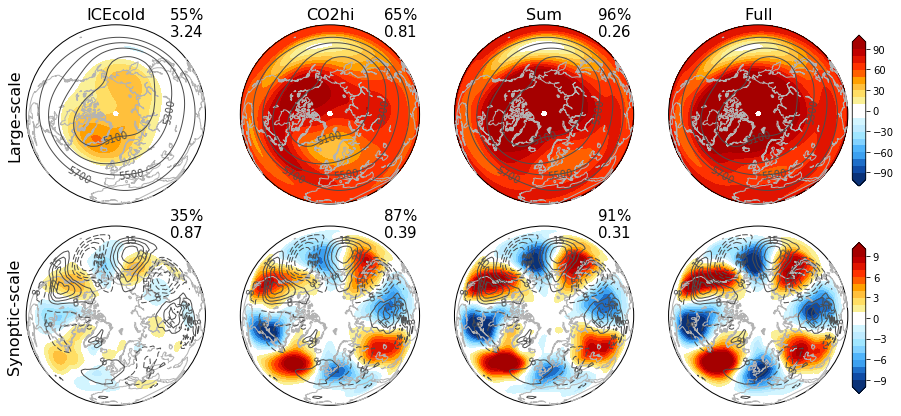

In [48]:
printtofile=True

addclimcont=True
fmt='%2.0f'
prstr=''
fsz=16


cby1=0.55; cby2=cby1; cby3=0.07; 
cbx2=0.775; cbx3=0.97
cbw=0.015; cbh=0.35

inctotal=False # include total (first row)?
ttls=('ICEcold','CO2hi','Sum','Full')
axrow=0



#fig = figure(5,figsize=[14,11])

#subplot(3,4,1)
if inctotal:
    fig,axs=plt.subplots(3,4,figsize=(12.5,8))
    
    cby1=0.68; cby2=.355; cby3=0.03; 
    cbx2=0.775; cbx3=0.949
    cbw=0.01; cbh=0.25


    ax=axs[axrow,0]

    bm,pc=cplotfield(Longitude, Latitude, ice_pert.squeeze(),ttls[0],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
    if addclimcont:
        prstr='climcont'
        cplt.add_contours(bm,pipi[:,:-1],Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
    ax.set_ylabel('Total',fontsize=fsz)
    ax.annotate('$%.0f$'%(icepvarexp) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
    ax.annotate('$%.2f$'%(icermse/std), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 

    #subplot(3,4,2)
    ax=axs[axrow,1]
    bm,pc=cplotfield(Longitude, Latitude, co2_pert.squeeze(),ttls[1],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
    if addclimcont:
        cplt.add_contours(bm,pipi[:,:-1],Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
    #subplot(3,4,3)
    ax=axs[axrow,2]
    bm,pc=cplotfield(Longitude, Latitude, combo,ttls[2],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
    if addclimcont:
        cplt.add_contours(bm,pipi[:,:-1],Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
    #subplot(3,4,4)
    ax=axs[axrow,3]
    bm,pc=cplotfield(Longitude, Latitude, full,ttls[3],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
    if addclimcont:
        cplt.add_contours(bm,pipi[:,:-1],Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
    ax.annotate('$%.0f$'%(pvarexp) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
    ax.annotate('$%.2f$'%(rmse/std), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
    cplt.add_colorbar(fig,pc,pos=[cbx3,cby1,cbw,cbh])
    axrow+=1
    ttls=('','','','')

else:
    prstr='notot'
    if addclimcont: prstr=prstr+'climcont'
        
    fig,axs=plt.subplots(2,4,figsize=(12.5,6))
    
ax=axs[axrow,0]    
bm,pc = cplotfield(Longitude[:-1], Latitude, ice_lpf, ttls[0],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
if addclimcont:
    cplt.add_contours(bm,pipi_lpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
ax.set_ylabel('Large-scale',fontsize=fsz)# (m<5)
ax.annotate('$%.0f$'%(icepvarexp_lpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(icermse_lpf/std_lpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,6)
ax=axs[axrow,1]
bm,pc=cplotfield(Longitude[:-1], Latitude, co2_lpf, ttls[1],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
if addclimcont:
    cplt.add_contours(bm,pipi_lpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
ax.annotate('$%.0f$'%(co2pvarexp_lpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(co2rmse_lpf/std_lpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,7)
ax=axs[axrow,2]
bm,pc=cplotfield(Longitude[:-1], Latitude, combo_lpf, ttls[2],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
if addclimcont:
    cplt.add_contours(bm,pipi_lpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
ax.annotate('$%.0f$'%(pvarexp_lpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(rmse_lpf/std_lpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,8)
ax=axs[axrow,3]
bm,pc=cplotfield(Longitude[:-1], Latitude, full_lpf, ttls[3],axis=ax,cmin=cmin,cmax=cmax,fsz=fsz)
if addclimcont:
    cplt.add_contours(bm,pipi_lpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsl,fmt=fmt)
cplt.add_colorbar(fig,pc,pos=[cbx3,cby2,cbw,cbh])
axrow+=1

ax=axs[axrow,0]
bm,pc=cplotfield(Longitude[:-1], Latitude, ice_pert.squeeze()[:,:-1]-ice_lpf, '',axis=ax,cmin=cmins,cmax=cmaxs)
if addclimcont:
    cplt.add_contours(bm,pipi_hpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsh,fmt=fmt)
ax.set_ylabel('Synoptic-scale',fontsize=fsz)# (m>=5)
ax.annotate('$%.0f$'%(icepvarexp_hpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(icermse_hpf/std_hpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,10)
ax=axs[axrow,1]
bm,pc=cplotfield(Longitude[:-1], Latitude, co2_pert.squeeze()[:,:-1]-co2_lpf, '',axis=ax,cmin=cmins,cmax=cmaxs)
if addclimcont:
    cplt.add_contours(bm,pipi_hpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsh,fmt=fmt)
ax.annotate('$%.0f$'%(co2pvarexp_hpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(co2rmse_hpf/std_hpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,11)
ax=axs[axrow,2]
bm,pc=cplotfield(Longitude[:-1], Latitude, combo_hpf, '',axis=ax,cmin=cmins,cmax=cmaxs)
if addclimcont:
    cplt.add_contours(bm,pipi_hpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsh,fmt=fmt)
ax.annotate('$%.0f$'%(pvarexp_hpf) + '%', xy=(0.795,1.03),xycoords='axes fraction',
                       fontsize=15)
ax.annotate('$%.2f$'%(rmse_hpf/std_hpf), xy=(0.795,0.935),xycoords='axes fraction',
                       fontsize=15) 
#subplot(3,4,12)
ax=axs[axrow,3]
bm,pc=cplotfield(Longitude[:-1], Latitude, full_hpf, '',axis=ax,cmin=cmins,cmax=cmaxs)
if addclimcont:
    cplt.add_contours(bm,pipi_hpf,Latitude,Longitude[:-1],verb=True,clab=True,levels=ctlcontsh,fmt=fmt)
cplt.add_colorbar(fig,pc,pos=[cbx3,cby3,cbw,cbh])

fig.tight_layout(pad=1.5,w_pad=.2)

if printtofile:
    fig.savefig(VariableName+'_ice_co2_sum_full_decomp_DJF_pattnorthof' +\
                str(northof) + prstr +'2w.pdf',bbox_inches='tight') 

/Users/kelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


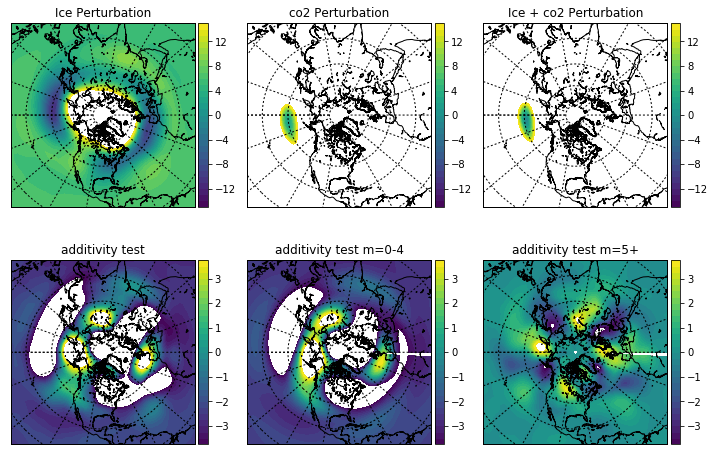

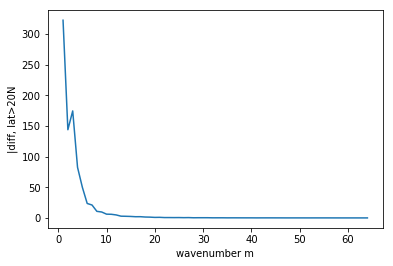

In [49]:
figure(1,figsize=[12,8])
subplot(2,3,1)
PlotField(Longitude, Latitude, ice_pert.squeeze(),'Ice Perturbation',cons)
subplot(2,3,2)
PlotField(Longitude, Latitude, co2_pert.squeeze(),'co2 Perturbation',cons)
subplot(2,3,3)
PlotField(Longitude, Latitude, ice_co2_pert.squeeze(),'Ice + co2 Perturbation',cons)
#figure(2)

subplot(2,3,4)
PlotField(Longitude, Latitude, diff, 'additivity test',cons/4)
Longitude2 = Longitude[:-1]
subplot(2,3,5)
PlotField(Longitude2, Latitude, lpf, 'additivity test m=0-4',cons/4)
subplot(2,3,6)
PlotField(Longitude2, Latitude, diff[:,:-1]-lpf, 'additivity test m=5+',cons/4)

#plot mean difference as function of wavenumber
figure(3)
diff_f = rfft(diff[:,:-1], axis=-1)
adiff = abs(diff_f[39:,1:])
meanadiff=adiff.mean(axis=0)
plot(arange(len(meanadiff))+1,meanadiff)
ylabel('|diff, lat>20N')
xlabel('wavenumber m')
#xlim((0,20))
#show()